### Actividad 4: Comprensión de los datos
Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!pip install matplotlib seaborn

In [3]:
import matplotlib.pyplot as plt

### Leer la base de datos

In [4]:
data = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### ¿Qué variables presentan datos atípicos?
Crear el boxplot utilizando Seaborn

In [5]:
var = data[['LotFrontage']]

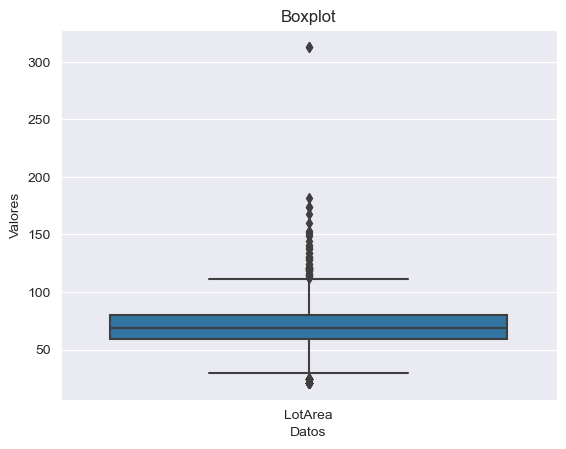

In [6]:
sns.boxplot(data=var)

plt.xticks([0], ['LotArea'])

plt.xlabel('Datos')
plt.ylabel('Valores')
plt.title('Boxplot')

plt.show()



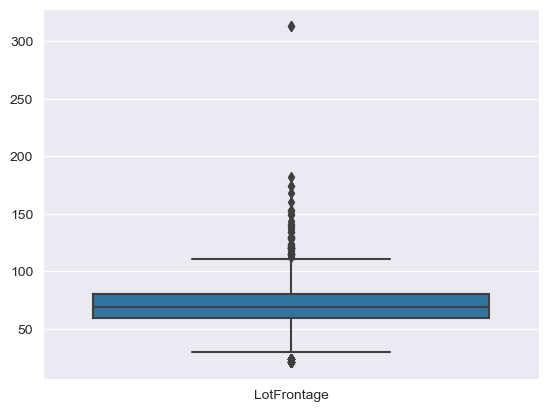

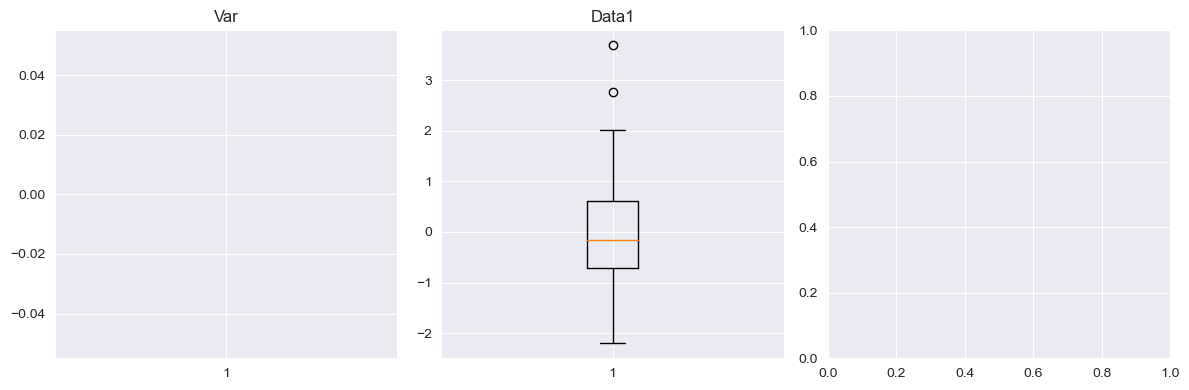

[-1.6225772  -0.6673087   0.96370758  0.67679992  0.73302989 -0.92051397
 -0.50000577  0.66226533 -0.36992402  0.51586562  1.96043223 -0.09992649
  3.68887791  0.60950607  0.23441721 -1.38391905 -1.3525233  -0.01385672
 -0.1415821  -0.23925708  2.76455089 -0.64365903  1.30397585  0.8057511
 -0.51598561  0.7661331  -0.33609798 -0.86253113  1.24250289 -1.50658172
  0.93532952  0.60273702  2.00434492  0.24038659 -1.43747182  1.37384358
  0.17542852  1.56405316 -0.62543655 -1.21842164 -2.20235647  0.19927453
 -0.657519    0.30011847 -1.10768481 -1.2018219  -0.49689999 -0.01291524
 -0.37956779  0.17160883  0.8728531   0.02720766  0.96584275 -1.77923513
 -0.28513481 -0.65658544 -0.4264272  -0.91142723  0.61400849 -0.37930537
  0.85571317 -1.40187059 -1.13537326 -1.12112254 -0.44940142  0.4819453
  0.32567344 -0.68634648  1.47372817 -0.05262904  1.37386165 -0.56488113
 -0.8849467   0.23266696 -1.12833775 -0.03402238 -0.7388167  -0.7456227
 -0.74191817 -0.3466293   0.24930293  0.06122214  1.05

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar datos aleatorios para los boxplots
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(2, 1, 100)
data3 = np.random.normal(-2, 1, 100)
var = data[['LotFrontage']]
sns.boxplot(data=var)

# Crear una matriz de subgráficos con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Agregar un boxplot a cada subgráfico utilizando la función boxplot de scipy
# La función boxplot de scipy no tiene todos los parámetros de personalización que tiene matplotlib
# Por lo tanto, utilizaremos matplotlib solo para personalización adicional
for ax, data, title in zip(axes, [var,data1], ['Var','Data1']):
    ax.boxplot(data)
    ax.set_title(title)

# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los subgráficos
plt.show()
print(data1)
print(type(var))
print((type(data1)))

### ¿En qué variables identifica un tipo de sesgo?
Creación del histograma

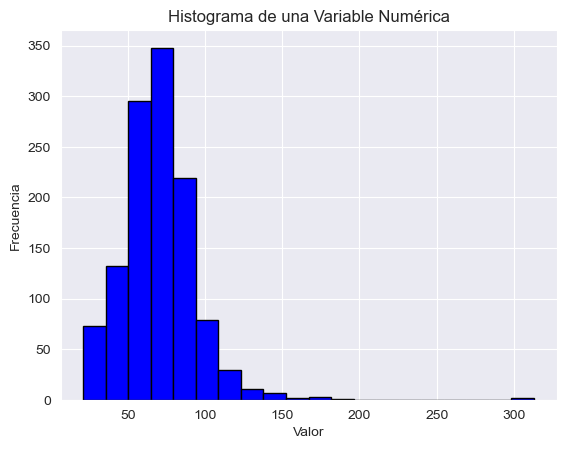

In [8]:
# Crear el histograma
plt.hist(var, bins=20, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de una Variable Numérica')

# Mostrar el histograma
plt.show()

## ¿Sigue una distribución normal cada variable numérica?
### Prueba de Anderson Darling

In [10]:
num = data.loc[:, data.columns!='MSSubClass']
numeric = num.select_dtypes(np.number)

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [ ]:
var = var.values.tolist()

In [ ]:
# Interpretar el resultado

if result.statistic.any() < result.critical_values[2]:
    print('No se puede rechazar la hipótesis nula: Los datos parecen provenir de una distribución normal.')
else:
    print('Se rechaza la hipótesis nula: Los datos no parecen provenir de una distribución normal.')
    
print()

In [ ]:

# Imprimir los resultados
print('Estadístico: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, datos normales (no se rechaza H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, datos no normales (se rechaza H0)' % (sl, cv))
